In [13]:
import numpy as np 
from matplotlib import pyplot as plt, colors as mcolors
from scipy import special

In [14]:
def ass_leg(l, m, x): 
    if l<0 or abs(m)>l : raise Exception("Error!!! Please check the values of l=" + l + "and m=" + m)
    if m==l : return (-1)**l*(1-x**2)**(l/2)*special.factorial2(2*l-1) 
    if m==l-1 : return x*(2*l-1)*ass_leg(l-1, l-1, x) 
    if m>=0 : return ((2*l-1)*x*ass_leg(l-1, m, x) - (l+m-1)*ass_leg(l-2, m, x))/(l+m)
    if m<0 : return (-1)**m*np.math.factorial(l+m)*ass_leg(l, -m, x)/np.math.factorial(l-m)

In [15]:
def ass_lag(n, l, x) : 
    if n < 0 or l < 0 : raise Exception("!!!Error!!! Please recheck values of n and l ")
    if n==0 : return  np.ones(x.shape)
    if n==1 : return 1 + l - x 
    else : return ((2*n - 1 + l - x)*ass_lag(n-1, l, x) - (n-1+l)*ass_lag(n-2, l, x))/n

In [16]:
def spherical_harmonics(l, m, theta, phi):
    Plm = ass_leg(l,m,np.cos(theta))
    phi_part = np.exp(1j*m*phi)
    mat = np.outer(Plm, phi_part)
    Ylm = mat*(-1)**m*np.sqrt(((2*l+1)*(np.math.factorial(l-m)))/(4*np.pi*np.math.factorial(l+m)))
    return Ylm

In [17]:
def radial(n, l, a, r):
    pre_fac = np.sqrt((2/(n*a*np.math.factorial(n+l)))**3*np.math.factorial(n-l-1)/(2*n))
    pre_func = np.exp(-r/(n*a))*((2*r)/(n*a))**l
    lag_part = ass_lag(n-l-1, 2*l+1, (2*r)/(n*a))
    return pre_fac*pre_func*lag_part


In [18]:
def wave_func(n, l, m, a, r, theta, phi):
    sph = spherical_harmonics(l, m, theta, phi)
    rad = radial(n, l, a, r) 
    psi = np.einsum('i, jk->ijk', rad, sph)
    return psi

In [42]:
theta = np.linspace(0, np.pi, 100) 
phi = np.linspace(-np.pi, np.pi, 100)
# r = np.linspace(0, 5, 100)
r = np.array([.5])
psi1 = wave_func(2,0,0, 1, r, theta, phi)
psi2 = wave_func(2,1,0, 1, r, theta, phi)
psi3 = wave_func(2,1,-1, 1, r, theta, phi)
psi4 = wave_func(3,2,0, 1, r, theta, phi)
R, T, P = np.meshgrid(r, theta, phi, indexing='ij')
X = np.sin(T)*np.cos(P)*R
Y = np.sin(T)*np.sin(P)*R
Z = np.cos(T)*R
F1 = np.real(psi1*psi1.conj())
F2 = np.real(psi2*psi2.conj())
F3 = np.real(psi3*psi3.conj())
F4 = np.real(psi4*psi4.conj())

In [38]:
colors = [(0,0,.5, c/2) for c in np.linspace(0.00001,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)

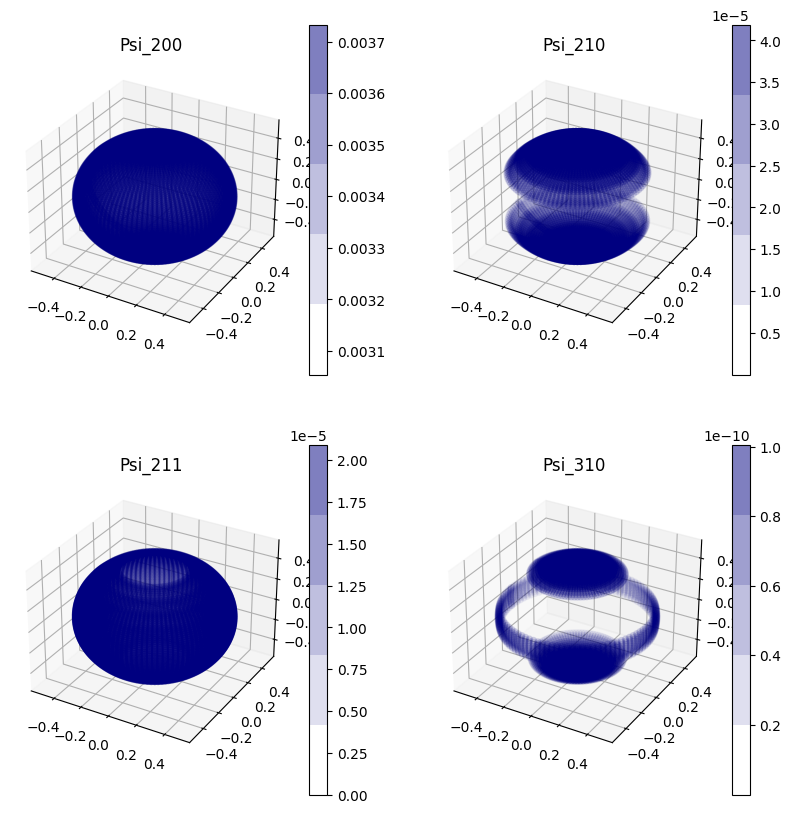

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.set_title("Psi_200")
h=ax.scatter(X, Y, Z, c=F1, cmap=cmapblue)
plt.colorbar(mappable=h)

ax = fig.add_subplot(222, projection='3d')
ax.set_title("Psi_210")
h=ax.scatter(X, Y, Z, c=F2, cmap=cmapblue)
plt.colorbar(mappable=h)

ax = fig.add_subplot(223, projection='3d')
ax.set_title("Psi_211")
h=ax.scatter(X, Y, Z, c=F3, cmap=cmapblue)
plt.colorbar(mappable=h)

ax = fig.add_subplot(224, projection='3d')
ax.set_title("Psi_310")
h=ax.scatter(X, Y, Z, c=F4, cmap=cmapblue)
plt.colorbar(mappable=h)

plt.show()